# UML 2 modelling - tasks
Marta Vohnoutova

## Use Case Vytvoření nového bonusu

<b> Popis problému </b>

Poznámka: V tomto Use Case diagramu <b style="color:Tomato;">neřešíme</b> stávající bonusy, pouze nové.

|<b style="color:Tomato;">Elementy</b> | <b style="color:Tomato;">Popis</b> | <b style="color:Tomato;">Pravomoci</b> |
| :- | -: | :-: |
| <b>Aktéři</b> | | |
| Manažer bonusů | návrhy nových bonusů, modifikace návrhů nových bonusů, rušení návrhů nových bonusů, předkládá boardu ke schválení návrh nového bonusu|Nemá rozhodovací pravomoc, pouze navrhuje |
| Analytické oddělení | na základě návrhu nového bonusu nebo modifikace stávajícího bonusu provádí ve spolupráci s IT oddělením simulace. Výsledky simulace předává Manažerovi bonusů|Nemá rozhodovací pravomoc, pouze proádí simulace a předává výsledky |
| IT oddělení | Provádí simulace a konfiguraci systémů banky ve všech prostředích| Vykonává pokyny Analytického oddělení a Boardu|
| Board banky | Schvaluje / zamítá nové bonusy nebo modifikace / rušení stávajících bonusů| Má rozhodovací pravomoc, nemá právo zápisu, nic sám neprovádí|
| <b>Systémy</b> | | |
| Bantovní transakční systém | Provádí bankovní IT činnosti| Skládá se z prostředí (subsystémů) vývojový, testovací, produkční|
| <b>Subsystémy</b> | | |
| Produkční prostředí | Provádí bankovní IT činnosti banky| |
| Testovací prostředí | Provádí testovací bankovní IT činnosti banky| |
| <b>Use Case (činnosti)</b> | | |
| Tvorba návrhu nového bonusu (CRUD)| Navrhuje a ladí se nový bonus| Manažer bonusu pouze- Tvorba, modifikace, čtení, rušení nového bonusu probíhá na základě existujících templatů |
| Tvorba návrhu nového bonusu - R | Čte se návrh nového bonus| Manažer bonusu, Analytické oddělení, Board, IT oddělení |
| Simulace v testovacím prostředí | Simulují se dopady nového bonusu| |
| Simulace v testovacím prostředí - pokyn k zahájení| Dává pokyn k zahájení simulace| Analytické oddělení|
| Simulace v testovacím prostředí - běh| Řídí běh simulace| IT oddělení|
| Simulace v testovacím prostředí - generování reportu simulace| Zaznamenání činnosti simulace| Simulace|
| Bonus - schvalovací proces| Odsimulovaný návrh bonusu jde ke schválení boardu návrh | Manažer bonusu, Board|
| Bonus schválen| Board rozhodne | Board|
| Bonus zamítnut| Board rozhodne | Board|
| Přesun nového bonusu do produkce| Board schválil | |
| Přesun nového bonusu do produkce - příkaz k přesunu| Board schválil | Board|
| Přesun nového bonusu do produkce - provedení přesunu| Board schválil | IT oddělení|



<b>Use Case diagram</b>

In [2]:
import iplantuml

In [210]:
# aby se vám do Jupyter okna vešel větší obrázek
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

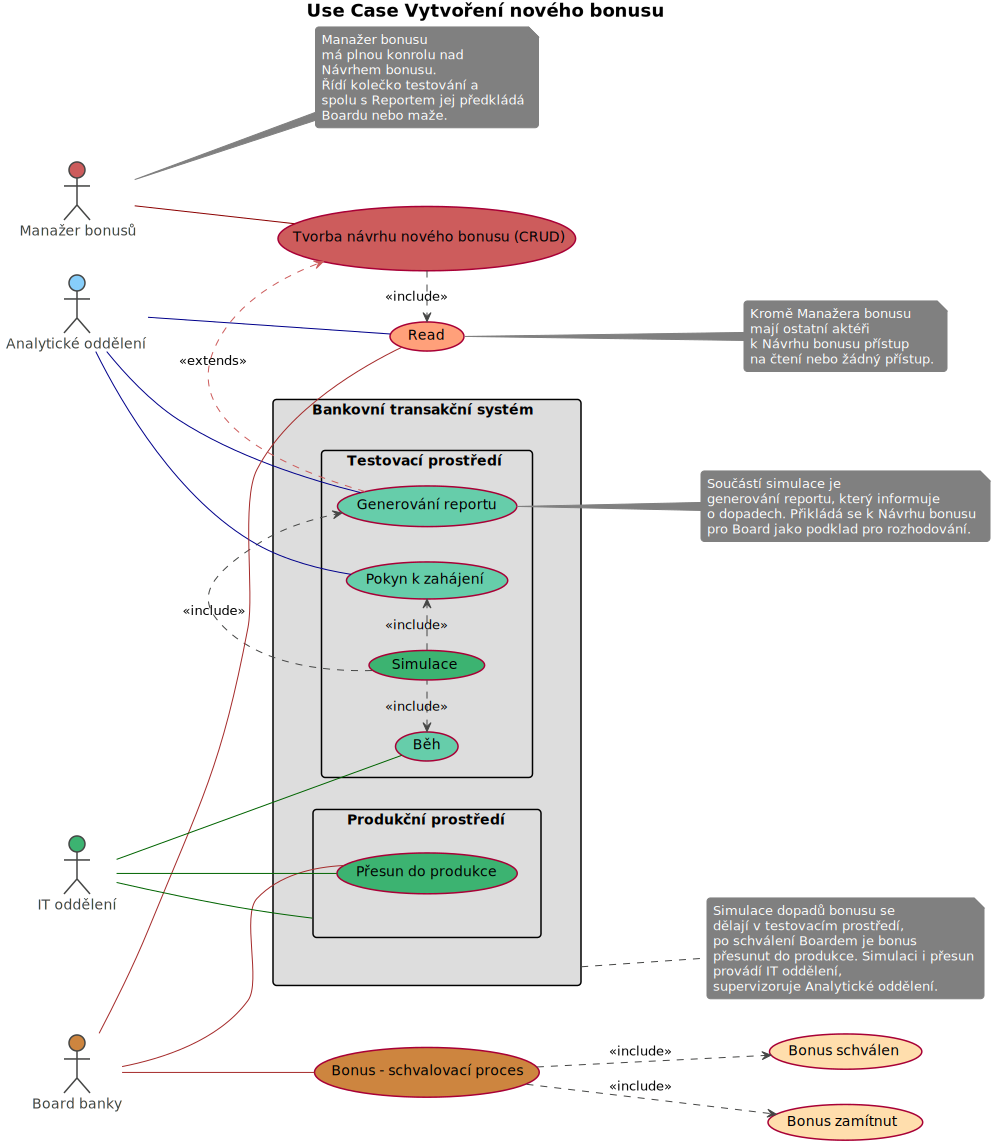

In [3]:
%%plantuml

@startuml
left to right direction
!theme toy
skinparam NoteBackgroundColor grey
skinparam NoteBorderColor grey
skinparam NoteFontColor white

' Titulek
title
<b>Use Case Vytvoření nového bonusu 
end title


' Systémy

actor "IT oddělení" as a_ito #MediumSeaGreen
rectangle "Bankovní transakční systém" as s_bts {
        
    rectangle "Produkční prostředí" as ss_pp {
        usecase "Přesun do produkce" as uc_pbp #MediumSeaGreen
        }    
    rectangle "Testovací prostředí" as ss_tp {
        
        usecase "Simulace" as uc_tp_s #MediumSeaGreen
        usecase "Pokyn k zahájení" as uc_tp_s_z #MediumAquaMarine        
        usecase "Běh" as uc_tp_s_b #MediumAquaMarine  
        usecase "Generování reportu" as uc_tp_s_r #MediumAquaMarine 
        }   
}
     


' Use Cases
together {
    actor "Manažer bonusů" as a_mb #IndianRed
    actor "Analytické oddělení" as a_ao #LightSkyBlue
    usecase "Tvorba návrhu nového bonusu (CRUD)" as uc_nb #IndianRed         
    usecase "Read" as uc_nb_r #LightSalmon    
    
}

together {  
    actor "Board banky" as a_bb #Peru 
    usecase "Bonus - schvalovací proces" as uc_nbs #Peru
    usecase "Bonus schválen" as uc_nbs_bs #NavajoWhite
    usecase "Bonus zamítnut" as uc_nbs_bz #NavajoWhite
       
}


uc_nb .> uc_nb_r: << include >> 
     
uc_nbs ..> uc_nbs_bs: << include >> 
uc_nbs ..> uc_nbs_bz: << include >> 
    
uc_tp_s .> uc_tp_s_z: << include >> 
uc_tp_s_b <. uc_tp_s: << include >> 
uc_tp_s .> uc_tp_s_r: << include >>
    
uc_tp_s_r .[#IndianRed].> uc_nb: << extends >> 
    

' manazer bonusu
a_mb -- uc_nb  #DarkRed 
' a_mb -- uc_nbs #DarkRed 
    
' analyticke oddeleni
a_ao -- uc_nb_r #DarkBlue
a_ao -- uc_tp_s_z #DarkBlue
a_ao -- uc_tp_s_r #DarkBlue

' board
a_bb -- uc_pbp #Brown 
a_bb -- uc_nb_r #Brown 
a_bb -- uc_nbs #Brown 

' IT oddělení
a_ito -- uc_pbp #DarkGreen 
a_ito -- uc_tp_s_b #DarkGreen 
a_ito -- ss_pp #DarkGreen 

' komentáře
note right of s_bts: Simulace dopadů bonusu se\ndělají v testovacím prostředí,\npo schválení Boardem je bonus\npřesunut do produkce. Simulaci i přesun\nprovádí IT oddělení,\nsupervizoruje Analytické oddělení.

note right of uc_tp_s_r: Součástí simulace je \ngenerování reportu, který informuje \no dopadech. Přikládá se k Návrhu bonusu \npro Board jako podklad pro rozhodování.

note right of a_mb: Manažer bonusu\nmá plnou konrolu nad\nNávrhem bonusu.\nŘídí kolečko testování a\nspolu s Reportem jej předkládá \nBoardu nebo maže.

note right of uc_nb_r: Kromě Manažera bonusu\nmají ostatní aktéři \nk Návrhu bonusu přístup\nna čtení nebo žádný přístup.

@enduml

In [4]:
import plantuml

In [5]:
! python -m plantuml plantuml1.txt  # zapíšeme jako obrázek

[{'filename': 'plantuml1.txt', 'gen_success': True}]


## Ten samý případ z měsíce

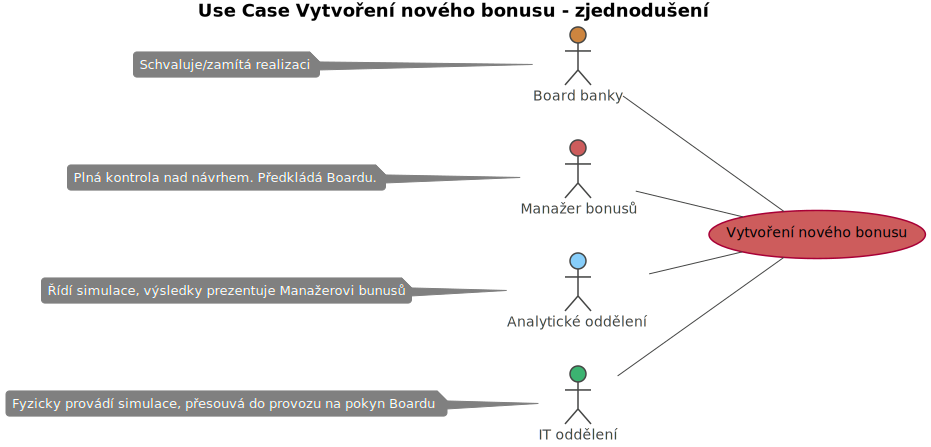

In [214]:
%%plantuml

@startuml
left to right direction
!theme toy
skinparam NoteBackgroundColor grey
skinparam NoteBorderColor grey
skinparam NoteFontColor white

' Titulek
title
<b>Use Case Vytvoření nového bonusu - zjednodušení
end title

' Use Case
usecase "Vytvoření nového bonusu" as uc_nb #IndianRed 

' Aktéři
actor "Board banky" as a_bb #Peru
actor "Manažer bonusů" as a_mb #IndianRed
actor "Analytické oddělení" as a_ao #LightSkyBlue
actor "IT oddělení" as a_ito #MediumSeaGreen

' vazby
a_bb -- uc_nb
a_mb -- uc_nb
a_ao -- uc_nb
a_ito -- uc_nb

' komentáře

note left of a_bb: <back:#Peru>Schvaluje/zamítá realizaci</back> 

note left of a_mb: <back:#IndianRed>Plná kontrola nad návrhem. Předkládá Boardu.</back> 

note left of a_ao: <back:#LightSkyBlue>Řídí simulace, výsledky prezentuje Manažerovi bunusů</back> 

note left of a_ito: <back:#MediumSeaGreen>Fyzicky provádí simulace, přesouvá do provozu na pokyn Boardu </back> 

@enduml